...

DataFrame loaded successfully from dummy_data.csv

Derived metrics: 'HasClaim', 'ClaimSeverity', and 'Margin' have been added to the DataFrame.
DataFrame loaded successfully from dummy_data.csv
Error: File not found at non_existent_file.csv
DataFrame loaded successfully from dummy_data.csv

Derived metrics: 'HasClaim', 'ClaimSeverity', and 'Margin' have been added to the DataFrame.
PostalCode Margin - ANOVA test p-value: 0.757763833082268
Fail to reject null hypothesis: Significant margin difference across postal codes.

DataFrame loaded successfully from dummy_data.csv

Derived metrics: 'HasClaim', 'ClaimSeverity', and 'Margin' have been added to the DataFrame.

Plot saved to test_plots\Claim Frequency by Province.png


<Figure size 1000x500 with 0 Axes>

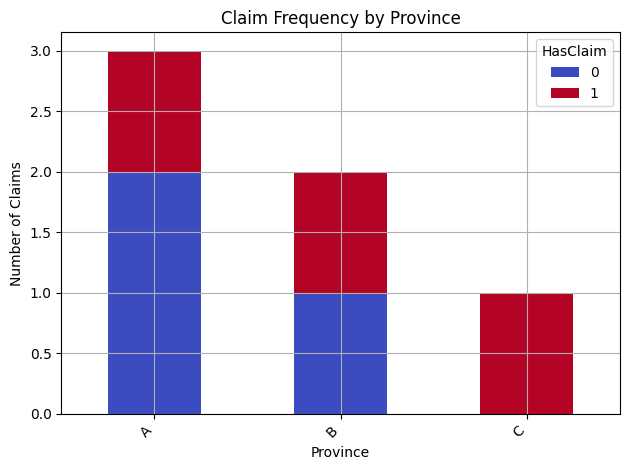


Plot saved to test_plots\Claim Severity by Province.png


c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


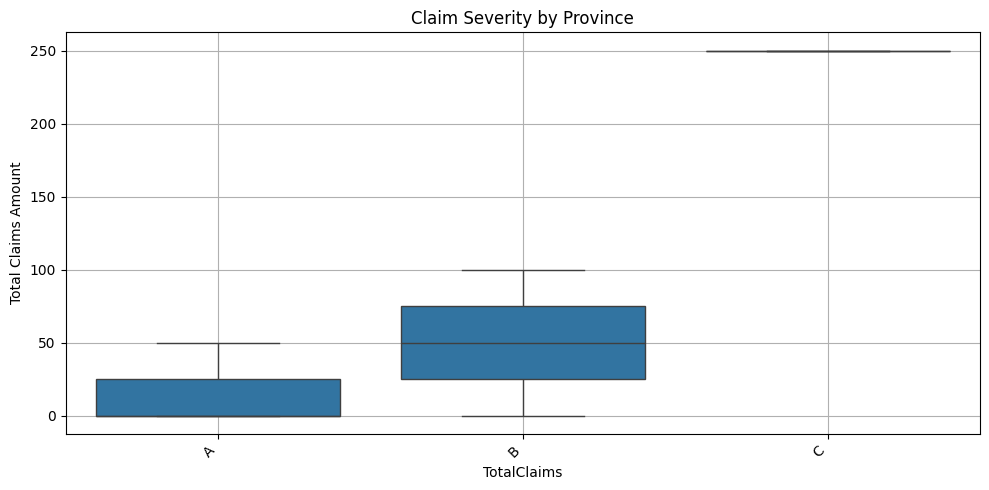

.c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:580: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\scripts\ABHypothesisTest.py:211: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = f_oneway(*groups)
.c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:580: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
c:\Users\nuhamin\Documents\kifiya\week 

Invalid plot_type: invalid. Choose between 'bar', and 'box'.
DataFrame loaded successfully from dummy_data.csv

Derived metrics: 'HasClaim', 'ClaimSeverity', and 'Margin' have been added to the DataFrame.
PostalCode Claim Frequency - Chi-square test p-value: 0.5134171190325922
Fail to reject null hypothesis: No significant risk differences in claim frequency across postal codes.

PostalCode Claim Severity - ANOVA test p-value: nan
Fail to reject null hypothesis: No significant risk differences in claim severity across postal codes.

DataFrame loaded successfully from dummy_data.csv

Derived metrics: 'HasClaim', 'ClaimSeverity', and 'Margin' have been added to the DataFrame.
Analysing risk differences across Provinces...
Province Claim Frequency - Chi-square test p-value: 0.5134171190325922
Fail to reject null hypothesis: No significant risk differences in claim frequency across provinces.

Province Claim Severity - ANOVA test p-value: nan
Fail to reject null hypothesis: No significant 

<Figure size 1000x500 with 0 Axes>

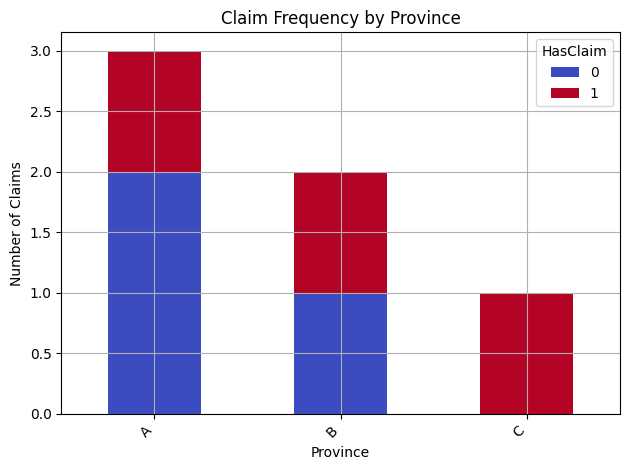

c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)



Plot saved to test_plots\Claim Severity by Province.png


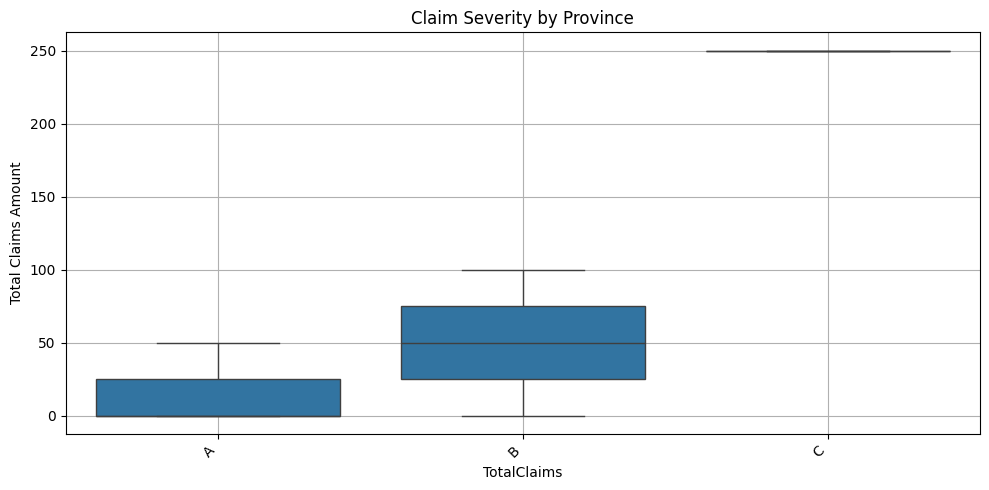

.

DataFrame loaded successfully from dummy_data.csv

Derived metrics: 'HasClaim', 'ClaimSeverity', and 'Margin' have been added to the DataFrame.
Analysing risk differences between Men and Women ...

Gender Claim Frequency - Chi-square test p-value: 0.10247043485974942
Fail to reject null hypothesis: No significant risk differences in claim frequency between men and women.

Not enough data for T-test on Gender Claim Severity.

Plot saved to test_plots\Claim Frequency by Gender.png


<Figure size 1000x500 with 0 Axes>

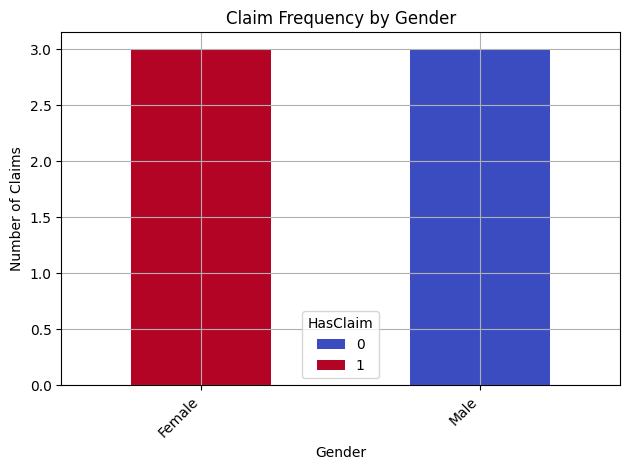


Plot saved to test_plots\Claim Severity by Gender.png


c:\Users\nuhamin\Documents\kifiya\week 3\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\.insurvenv\Lib\site-packages\seaborn\categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


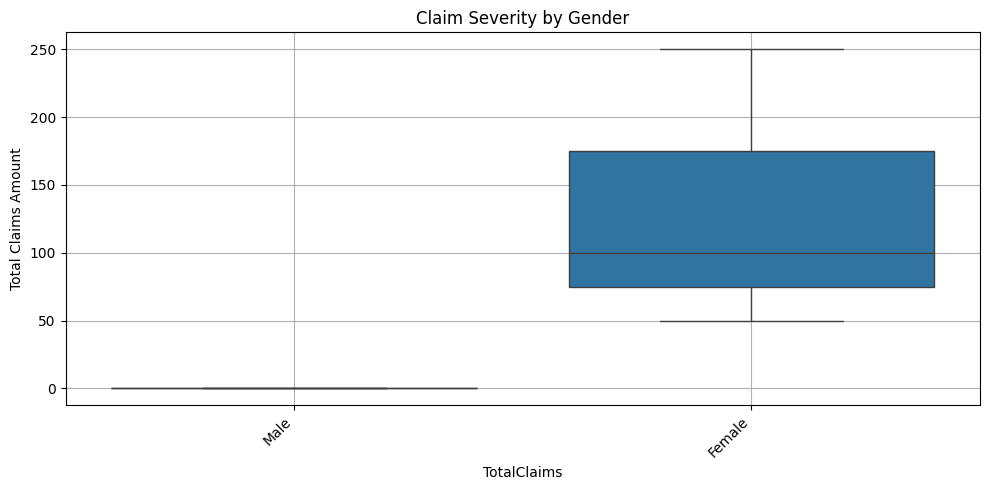

..
----------------------------------------------------------------------
Ran 8 tests in 1.628s

OK


DataFrame loaded successfully from dummy_data.csv

Plot saved to test_plots\test_plot.png


In [1]:
import unittest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


#define path
sys.path.append(os.path.abspath(os.path.join('..')))

#import custom modules
from scripts.ABHypothesisTest import ABHypothesis_testing 

class TestABHypothesisTesting(unittest.TestCase):

    def setUp(self):
        #create a dummy DataFrame for testing
        data = {'TotalClaims': [0, 100, 0, 250, 0, 50],
                'TotalPremium': [500, 600, 400, 700, 300, 550],
                'Province': ['A', 'B', 'A', 'C', 'B', 'A'],
                'PostalCode': ['12345', '67890', '12345', '98765', '67890', '12345'],
                'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female']}
        self.df = pd.DataFrame(data)
        self.dummy_csv_path = 'dummy_data.csv'
        self.df.to_csv(self.dummy_csv_path, index=False)
        self.plot_folder = 'test_plots'

        #initialise the class
        self.ab_test = ABHypothesis_testing(df_path=self.dummy_csv_path, plot_folder=self.plot_folder)

    def tearDown(self):
        #clean up the dummy CSV file and plot folder
        if os.path.exists(self.dummy_csv_path):
            os.remove(self.dummy_csv_path)
        if os.path.exists(self.plot_folder):
            for file in os.listdir(self.plot_folder):
                os.remove(os.path.join(self.plot_folder, file))
            os.rmdir(self.plot_folder)

    def test_load_processed_df(self):
        self.assertIsNotNone(self.ab_test.df)
        self.assertTrue(isinstance(self.ab_test.df, pd.DataFrame))
        self.assertFalse(self.ab_test.df.empty)

        #test with a non-existent file
        ab_test_invalid = ABHypothesis_testing(df_path='non_existent_file.csv')
        self.assertIsNone(ab_test_invalid.df)

    def test_save_plot(self):
        #create a dummy plot to save
        plt.figure()
        plt.plot([1, 2, 3], [4, 5, 6])
        plot_name = 'test_plot.png'
        self.ab_test.save_plot(plot_name)
        plot_path = os.path.join(self.plot_folder, plot_name)
        self.assertTrue(os.path.exists(plot_path))
        plt.close() #close the plot figure

    def test_derived_metrics(self):
        self.ab_test.derived_metrics()
        self.assertIn('HasClaim', self.ab_test.df.columns)
        self.assertIn('ClaimSeverity', self.ab_test.df.columns)
        self.assertIn('Margin', self.ab_test.df.columns)
        self.assertEqual(list(self.ab_test.df['HasClaim']), [0, 1, 0, 1, 0, 1])
        
        #use isnan for comparing with NaN
        self.assertTrue(np.isnan(self.ab_test.df['ClaimSeverity'][0]))
        self.assertEqual(self.ab_test.df['ClaimSeverity'][1], 100)
        self.assertEqual(list(self.ab_test.df['Margin']), [500, 500, 400, 450, 300, 500])

    def test_plot_distribution(self):
        # Test plotting without errors
        self.ab_test.derived_metrics()
        self.ab_test.plot_distribution(column='Province', plot_type='bar')
        self.ab_test.plot_distribution('TotalClaims', hue='Province', plot_type='box')

        #test with invalid plot type
        self.ab_test.plot_distribution(column='Province', plot_type='invalid')

    def test_risk_differences_across_provinces(self):
        self.ab_test.derived_metrics()
        #test if the method runs without errors
        self.ab_test.risk_differences_across_provinces()

    def test_risk_differences_across_postalcodes(self):
        self.ab_test.derived_metrics()
        #test if the method runs without errors
        self.ab_test.risk_differences_across_postalcodes()

    def test_margin_differences_across_postalcodes(self):
        self.ab_test.derived_metrics()
        #test if the method runs without errors
        self.ab_test.margin_differences_across_postalcodes()

    def test_risk_differences_between_genders(self):
        self.ab_test.derived_metrics()
        #test if the method runs without errors
        self.ab_test.risk_differences_between_genders()

#run class
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)